<a href="https://colab.research.google.com/github/kimheeseo/LSCNS/blob/main/OSNR_Link_Budget_Methodology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

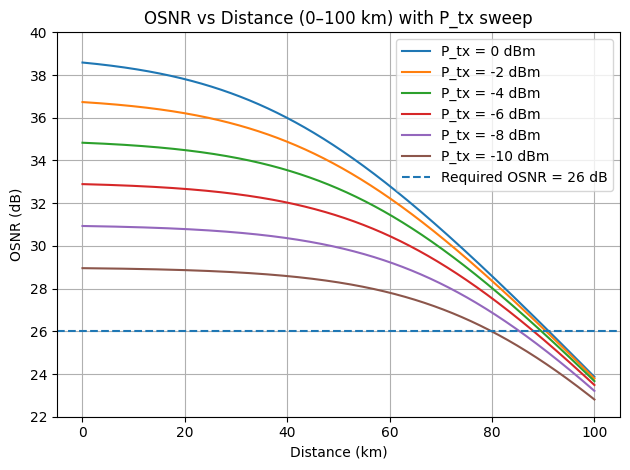

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Given constants
P_out = 0.0          # dBm
L_m = 10.0           # dB
NF = 6.0             # dB
alpha = 0.25         # dB/km
G_ripple = 1.0       # dB
OSNR_penalty = 2.0   # dB
OSNR_tol = 26.0      # dB (required tolerance)

# Distance axis: 0 ~ 100 km
distance_km = np.linspace(0, 100, 1001)
L_f = alpha * distance_km  # dB

def tx_loss_db(L_f_db, P_out_dbm, L_m_db, P_tx_dbm):
    """
    TX_loss = 10*log10( 1 + (10^(L_f/10)*10^(P_out/10)) / (10^(L_m/10)*10^(P_tx/10)) )
    """
    num = (10 ** (-L_f_db / 10.0)) * (10 ** (P_out_dbm / 10.0))
    den = (10 ** (-L_m_db / 10.0)) * (10 ** (P_tx_dbm / 10.0))
    return 10.0 * np.log10(1.0 + (num / den))

def osnr_db(L_f_db, P_out_dbm, NF_db, TX_loss_db, G_ripple_db, OSNR_penalty_db):
    """
    OSNR_dB = 58 + P_out - L_f - NF - TX_loss - G_ripple - OSNR_penalty
    """
    return 58.0 + P_out_dbm - L_f_db - NF_db - TX_loss_db - G_ripple_db - OSNR_penalty_db

# P_tx sweep: 0 to -10 dBm
P_tx_values = np.arange(0, -10.1, -2.0)  # 0, -2, -4, -6, -8, -10 dBm

plt.figure()
for P_tx in P_tx_values:
    TX_loss = tx_loss_db(L_f, P_out, L_m, P_tx)
    OSNR = osnr_db(L_f, P_out, NF, TX_loss, G_ripple, OSNR_penalty)
    plt.plot(distance_km, OSNR, label=f"P_tx = {P_tx:.0f} dBm")

# Required OSNR tolerance line
plt.axhline(OSNR_tol, linestyle="--", linewidth=1.5, label=f"Required OSNR = {OSNR_tol:.0f} dB")

plt.xlabel("Distance (km)")
plt.ylabel("OSNR (dB)")
plt.title("OSNR vs Distance (0–100 km) with P_tx sweep")
plt.ylim(22, 40)   # 👈 y-axis 범위 제한
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
